# Union of Road and Land Networks

Combine the road and SA2 shapefiles. Augment the road network information to the SA2 shapefiles. For now, I only augmented the road class information to the SA2 shapefile.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot
import pickle
import geoplot.crs as gcrs


/home/jasonllu/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.9.0-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# read spatial files
sa2_south_au = gpd.read_file("../../data_process/shapefiles/sa2_south_au.shp")
sa2_adelaide = gpd.read_file('../../data_process/shapefiles/sa2_adelaide.shp')

# read road networks
sa2_roads = gpd.read_file("../../data_process/shapefiles/sa2_roads.shp")


In [3]:
# crs and projection
sa2_adelaide_proj = sa2_adelaide.to_crs("epsg:3112")
sa2_roads_proj = sa2_roads.to_crs("epsg:3112")


In [4]:
# col names. Use "class" from roads only
print(sa2_roads_proj.columns)
print(sa2_adelaide_proj.columns)


Index(['persistent', 'featurecod', 'name', 'roadtype', 'typesuffix', 'class',
       'surface', 'routenum', 'status', 'ontype', 'capturesou', 'capturemet',
       'featuresou', 'featurerel', 'attributer', 'horizontal', 'fa_auditda',
       'fa_class', 'fa_source', 'fa_method', 'fa_status', 'fa_validat',
       'roadusetyp', 'roaduseaut', 'road_id', 'one_way', 'f_elev', 't_elev',
       'crrs_road_', 'cwy_code', 'tars_road_', 'suburbidle', 'suburbidri',
       'last_edite', 'shape_Leng', 'geometry'],
      dtype='object')
Index(['SA2_MAIN16', 'SA2_5DIG16', 'SA2_NAME16', 'SA3_CODE16', 'SA3_NAME16',
       'SA4_CODE16', 'SA4_NAME16', 'GCC_CODE16', 'GCC_NAME16', 'STE_CODE16',
       'STE_NAME16', 'AREASQKM16', 'geometry'],
      dtype='object')


In [5]:
sa2_roads_proj.head()

,persistent,featurecod,name,roadtype,typesuffix,class,surface,routenum,status,ontype,...,f_elev,t_elev,crrs_road_,cwy_code,tars_road_,suburbidle,suburbidri,last_edite,shape_Leng,geometry
0,3004811,2013,MULLALONG,TRACK,None,TRK4,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,560713.0,560713.0,2016-04-15,0.010374,"LINESTRING (108993.337 -3880788.437, 108990.47..."
1,3004805,2013,MORGANS,TRACK,None,TRK4,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,560713.0,560713.0,2016-04-15,0.001466,"LINESTRING (110750.943 -3884194.726, 110754.13..."
2,3004816,2013,POINT BURGESS,TRACK,None,TRK4,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,560713.0,560713.0,2016-04-15,0.000529,"LINESTRING (110818.401 -3878360.606, 110816.59..."
3,3288022,2013,None,None,None,TRK2,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,NaN,NaN,2015-11-18,0.000724,"LINESTRING (-282183.479 -2970878.166, -282171...."
4,123120,2013,None,None,None,TRK4,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,560713.0,560713.0,2016-04-15,0.002936,"LINESTRING (110876.133 -3884149.235, 110865.74..."


In [6]:
sa2_roads_proj['class'].value_counts() # ten groups. 

LOCL    187811
TRK2    179227
COLL     29342
SUBA     27039
ART      15856
TRK4     10369
HWY       6439
UND        744
FREE       706
BUS        167
Name: class, dtype: int64

In [7]:
sa2_adelaide_proj.head(110)

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((417263.891 -3939518.653, 417262.345 ..."
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((417476.199 -3936647.849, 417544.905 ..."
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((433666.133 -3928044.498, 433628.032 ..."
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((427353.316 -3946292.628, 427421.744 ..."
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((435785.372 -3950672.079, 435799.037 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,404031105,41105,Fulham,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,1.3212,"POLYGON ((410502.489 -3938804.420, 410496.375 ..."
106,404031106,41106,Lockleys,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,5.7020,"POLYGON ((411842.413 -3938239.458, 411857.841 ..."
107,404031107,41107,Plympton,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,10.6969,"POLYGON ((413778.862 -3941759.801, 413777.655 ..."
108,404031108,41108,Richmond (SA),40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,8.9253,"POLYGON ((414829.341 -3937727.856, 414828.056 ..."


In [8]:
# shape
print(sa2_adelaide_proj.shape)
print(sa2_roads_proj.shape)

(110, 13)
(457700, 36)


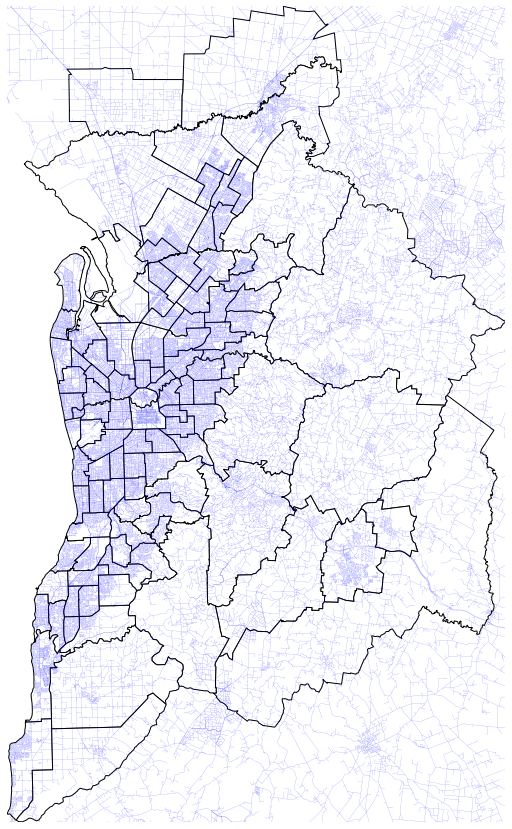

In [9]:
# plot
# a = gpd.GeoSeries(sa2_adelaide_proj.loc[0,'geometry'])

ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (15,15))
# a.plot(ax = ax, edgecolor='r')
sa2_roads_proj.plot(ax = ax, edgecolor='b', linewidth=0.1)
ax.set_xlim(sa2_adelaide_proj.total_bounds[0], sa2_adelaide_proj.total_bounds[2])
ax.set_ylim(sa2_adelaide_proj.total_bounds[1], sa2_adelaide_proj.total_bounds[3])
ax.set_axis_off()


# Intersect the two networks

In [10]:
# create the centroids for roads
road_centroid = sa2_roads_proj.centroid
road_centroid

0          POINT (108538.439 -3880783.631)
1          POINT (110812.331 -3884165.616)
2          POINT (110813.670 -3878387.000)
3         POINT (-282149.411 -2970870.881)
4          POINT (110769.285 -3884227.123)
                        ...               
457695     POINT (465066.564 -3107127.133)
457696     POINT (485185.958 -3954756.721)
457697     POINT (485247.204 -3952285.199)
457698     POINT (486868.900 -3954286.798)
457699     POINT (326263.273 -3726646.093)
Length: 457700, dtype: geometry

In [11]:
# attach SA2 idx to road networks
sa2_roads_proj['SA2_loc'] = -1 # init as -1.

for SA2_idx in range(sa2_adelaide_proj.shape[0]):
    print(SA2_idx)
    # assign SA2_idx to the road network
    within_logic = road_centroid.within(sa2_adelaide_proj.loc[SA2_idx, 'geometry'])
    sa2_roads_proj.loc[within_logic, 'SA2_loc'] = SA2_idx
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


In [12]:
# Use only the 'class' variable for now. 
sa2_roads_class_proj = sa2_roads_proj[['class', 'geometry', 'SA2_loc']]
sa2_roads_class_proj_dummies = pd.get_dummies(sa2_roads_class_proj)
sa2_roads_class_proj_dummies.head()

,geometry,SA2_loc,class_ART,class_BUS,class_COLL,class_FREE,class_HWY,class_LOCL,class_SUBA,class_TRK2,class_TRK4,class_UND
0,"LINESTRING (108993.337 -3880788.437, 108990.47...",-1,0,0,0,0,0,0,0,0,1,0
1,"LINESTRING (110750.943 -3884194.726, 110754.13...",-1,0,0,0,0,0,0,0,0,1,0
2,"LINESTRING (110818.401 -3878360.606, 110816.59...",-1,0,0,0,0,0,0,0,0,1,0
3,"LINESTRING (-282183.479 -2970878.166, -282171....",-1,0,0,0,0,0,0,0,1,0,0
4,"LINESTRING (110876.133 -3884149.235, 110865.74...",-1,0,0,0,0,0,0,0,0,1,0


In [13]:
# aggregate the road attribute dummies for SA2.
sa2_roads_class_proj_dummies = sa2_roads_class_proj_dummies.loc[sa2_roads_class_proj_dummies['SA2_loc'] > -1]
print(sa2_roads_class_proj_dummies.shape)
sa2_road_class_agg=sa2_roads_class_proj_dummies.groupby(by='SA2_loc').sum()
sa2_road_class_agg.head(20)

(110562, 12)


,class_ART,class_BUS,class_COLL,class_FREE,class_HWY,class_LOCL,class_SUBA,class_TRK2,class_TRK4,class_UND
SA2_loc,,,,,,,,,,
0,208.0,13.0,402.0,0.0,0.0,1089.0,501.0,0.0,0.0,10.0
1,59.0,3.0,221.0,0.0,0.0,248.0,108.0,0.0,0.0,1.0
2,286.0,0.0,244.0,0.0,0.0,1096.0,188.0,2737.0,37.0,0.0
3,90.0,0.0,107.0,88.0,0.0,1360.0,421.0,700.0,0.0,19.0
4,87.0,0.0,49.0,24.0,0.0,438.0,73.0,423.0,0.0,0.0
5,98.0,0.0,294.0,1.0,0.0,870.0,227.0,806.0,1.0,7.0
6,66.0,0.0,207.0,29.0,0.0,1349.0,146.0,127.0,0.0,24.0
7,101.0,0.0,78.0,24.0,0.0,1014.0,242.0,965.0,0.0,0.0
8,0.0,0.0,34.0,6.0,0.0,261.0,83.0,45.0,0.0,4.0


In [14]:
# augment road class variables to SA2_network.
sa2_adelaide_proj = sa2_adelaide_proj.merge(sa2_road_class_agg, how='inner', left_index=True, right_index=True)

In [15]:
# 
sa2_adelaide_proj.head()

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,...,class_ART,class_BUS,class_COLL,class_FREE,class_HWY,class_LOCL,class_SUBA,class_TRK2,class_TRK4,class_UND
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,208.0,13.0,402.0,0.0,0.0,1089.0,501.0,0.0,0.0,10.0
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,59.0,3.0,221.0,0.0,0.0,248.0,108.0,0.0,0.0,1.0
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,286.0,0.0,244.0,0.0,0.0,1096.0,188.0,2737.0,37.0,0.0
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,90.0,0.0,107.0,88.0,0.0,1360.0,421.0,700.0,0.0,19.0
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,87.0,0.0,49.0,24.0,0.0,438.0,73.0,423.0,0.0,0.0


In [16]:
sa2_adelaide_proj.columns

Index(['SA2_MAIN16', 'SA2_5DIG16', 'SA2_NAME16', 'SA3_CODE16', 'SA3_NAME16',
       'SA4_CODE16', 'SA4_NAME16', 'GCC_CODE16', 'GCC_NAME16', 'STE_CODE16',
       'STE_NAME16', 'AREASQKM16', 'geometry', 'class_ART', 'class_BUS',
       'class_COLL', 'class_FREE', 'class_HWY', 'class_LOCL', 'class_SUBA',
       'class_TRK2', 'class_TRK4', 'class_UND'],
      dtype='object')

In [17]:
sa2_roads_proj.columns

Index(['persistent', 'featurecod', 'name', 'roadtype', 'typesuffix', 'class',
       'surface', 'routenum', 'status', 'ontype', 'capturesou', 'capturemet',
       'featuresou', 'featurerel', 'attributer', 'horizontal', 'fa_auditda',
       'fa_class', 'fa_source', 'fa_method', 'fa_status', 'fa_validat',
       'roadusetyp', 'roaduseaut', 'road_id', 'one_way', 'f_elev', 't_elev',
       'crrs_road_', 'cwy_code', 'tars_road_', 'suburbidle', 'suburbidri',
       'last_edite', 'shape_Leng', 'geometry', 'SA2_loc'],
      dtype='object')

In [18]:
count ={}
for elt in sa2_roads_proj["SA2_loc"]:
    if elt in count:
        count[elt] += 1
    else:
        count[elt] = 1
print(count)

{-1: 347138, 95: 1026, 30: 859, 33: 839, 29: 993, 5: 2304, 88: 592, 8: 433, 4: 1094, 6: 1948, 31: 1516, 34: 1606, 7: 2424, 26: 763, 24: 1262, 46: 1475, 71: 774, 74: 813, 84: 812, 60: 784, 63: 700, 25: 1995, 43: 962, 28: 1220, 27: 1164, 87: 2058, 75: 1044, 49: 1181, 32: 1329, 2: 4588, 82: 218, 13: 573, 14: 1345, 78: 576, 97: 1069, 83: 1522, 67: 855, 50: 707, 102: 1609, 15: 1220, 10: 992, 45: 1201, 44: 1200, 100: 1019, 55: 943, 40: 952, 17: 731, 9: 2091, 99: 991, 96: 914, 103: 62, 38: 213, 101: 1306, 16: 604, 47: 1074, 12: 929, 72: 1340, 23: 931, 11: 652, 42: 884, 48: 625, 35: 1733, 85: 542, 1: 640, 76: 232, 59: 723, 94: 458, 93: 1363, 90: 559, 0: 2223, 77: 703, 91: 883, 20: 785, 109: 306, 104: 277, 57: 1190, 107: 1405, 73: 885, 98: 89, 52: 1342, 81: 183, 19: 322, 36: 1763, 37: 1269, 80: 806, 86: 748, 3: 2785, 61: 1110, 39: 936, 51: 675, 18: 851, 21: 540, 53: 1124, 105: 208, 92: 860, 106: 714, 54: 972, 79: 428, 89: 719, 22: 973, 62: 855, 58: 752, 68: 788, 108: 1262, 41: 76, 56: 866, 69: 

In [36]:
# save
sa2_adelaide_proj.to_file("../../data_process/shapefiles/sa2_adelaide_proj_road_class.shp")

In [20]:
SA_idxs = sorted((key,count[key]) for key in count)

In [21]:
# SA_idx_to_numinter = {}
# for sa_idx,c in SA_idxs:
#     print(sa_idx)
#     if sa_idx != -1:
#         within = sa2_roads_proj[sa2_roads_proj["SA2_loc"]==sa_idx]
#         num_inter = 0
#         print(len(within))
#         for line in within["geometry"]:
#             for line2 in within["geometry"]:
#                 if line != line2:
#                     inter = line.intersection(line2)
#                     if inter:
#                         num_inter += 1
#         SA_idx_to_numinter[sa_idx] = num_inter

In [22]:
sa2_roads_proj["geometry"].head()

0    LINESTRING (108993.337 -3880788.437, 108990.47...
1    LINESTRING (110750.943 -3884194.726, 110754.13...
2    LINESTRING (110818.401 -3878360.606, 110816.59...
3    LINESTRING (-282183.479 -2970878.166, -282171....
4    LINESTRING (110876.133 -3884149.235, 110865.74...
Name: geometry, dtype: geometry

In [23]:
!pip3 install momepy
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

In [24]:
sa_idx_to_graph = {}
for sa_idx,c in SA_idxs[1:]:
    print(sa_idx)
    within = sa2_roads_proj[sa2_roads_proj["SA2_loc"]==sa_idx]
    graph = momepy.gdf_to_nx(within, approach='primal')
    sa_idx_to_graph[sa_idx] = graph

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


In [25]:
g = sa_idx_to_graph[0]

In [26]:
degree = dict(nx.degree(g))
nx.set_node_attributes(g, degree, 'degree')
g = momepy.node_degree(g, name='degree')

In [27]:
node_df, edge_df, sw = momepy.nx_to_gdf(g, points=True, lines=True,
                                    spatial_weights=True)

/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [28]:
node_df.head()

,degree,nodeID,geometry
0,3,1,POINT (418877.802 -3938707.771)
1,3,2,POINT (418887.392 -3938779.594)
2,4,3,POINT (417578.781 -3940619.842)
3,3,4,POINT (417566.018 -3940609.071)
4,3,5,POINT (417935.767 -3940610.423)


In [29]:
degree_df = pd.DataFrame(columns=["SA2_MAIN16", "num_nodes", "num_1degree", "num_2degree", "num_3degree", "num_4degree", "num_greater5degree"])

In [30]:
degree_df

,SA2_MAIN16,num_nodes,num_1degree,num_2degree,num_3degree,num_4degree,num_greater5degree


In [31]:
degree_df.columns

Index(['SA2_MAIN16', 'num_nodes', 'num_1degree', 'num_2degree', 'num_3degree',
       'num_4degree', 'num_greater5degree'],
      dtype='object')

In [32]:
for sa_idx in sa_idx_to_graph:
    print(sa_idx)
    g = sa_idx_to_graph[sa_idx]
    degree = dict(nx.degree(g))
    nx.set_node_attributes(g, degree, 'degree')
    g = momepy.node_degree(g, name='degree')
    node_df, edge_df, sw = momepy.nx_to_gdf(g, points=True, lines=True,
                                    spatial_weights=True)
    
    SA2_MAIN16 = sa2_adelaide_proj.iloc[sa_idx]["SA2_MAIN16"]
    #nodes is intersections
    num_nodes = len(node_df)
    #num_0degree = len(node_df[node_df["degree"]==0])
    num_1degree = len(node_df[node_df["degree"]==1])
    num_2degree = len(node_df[node_df["degree"]==2])
    num_3degree = len(node_df[node_df["degree"]==3])
    num_4degree = len(node_df[node_df["degree"]==4])
    num_greater5degree = len(node_df[node_df["degree"]>=5])
    degree_df = degree_df.append({"SA2_MAIN16": SA2_MAIN16, "num_nodes":num_nodes,  
                                  "num_1degree":num_1degree, "num_2degree":num_2degree, "num_3degree":num_3degree,
                                  "num_4degree":num_4degree,
                                  "num_greater5degree":num_greater5degree},
                                ignore_index=True)
    

0


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


1
2


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 58 disconnected components.
  warnings.warn(message)


3


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 21 disconnected components.
  warnings.warn(message)


4


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
  warnings.warn(message)


5


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 18 disconnected components.
  warnings.warn(message)


6


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 29 disconnected components.
  warnings.warn(message)


7


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 47 disconnected components.
  warnings.warn(message)


8
9


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
  warnings.warn(message)


10
11


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


12
13


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


14
15


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)


16
17
18


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


19
20
21


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  warnings.warn(message)


22
23


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
  warnings.warn(message)


24
25


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)


26
27


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)


28
29


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)


30
31


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
  warnings.warn(message)


32
33


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 15 disconnected components.
  warnings.warn(message)


34
35
36


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


37
38
39
40


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 15 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


41
42
43


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


44
45


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)


46
47


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)


48
49


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  warnings.warn(message)


50
51


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)


52
53


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 24 disconnected components.
  warnings.warn(message)


54
55


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)


56
57


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


58
59
60


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


61
62


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


63
64
65


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected compon

66
67
68
69
70


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


71
72


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)


73
74


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)


75
76


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 29 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)


77
78
79


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 15 disconnected components.
  warnings.warn(message)


80
81
82


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
  warnings.warn(message)


83
84


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


85
86
87


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 22 disconnected components.
  warnings.warn(message)


88
89
90


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


91
92


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


93
94
95
96


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


97
98
99


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


100
101


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


102
103


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  warnings.warn(message)


104
105
106
107


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)


108
109


/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/home/jasonllu/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [33]:
degree_df

,SA2_MAIN16,num_nodes,num_1degree,num_2degree,num_3degree,num_4degree,num_greater5degree
0,401011001,1642,291,199,865,276,11
1,401011002,517,149,54,239,69,6
2,401021003,4034,1174,731,1982,141,6
3,401021004,2455,710,502,1126,110,7
4,401021005,989,286,245,421,36,1
...,...,...,...,...,...,...,...
105,404031105,157,28,19,90,20,0
106,404031106,530,102,39,308,81,0
107,404031107,1036,170,105,616,143,2
108,404031108,887,125,120,410,231,1


In [34]:
degree_df.to_pickle('../../data_process/degree_df.pickle')